# Research on Megaline plans

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.

### Step 1. Open the data file and study the general information

In [1]:
#load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from functools import reduce
from math import factorial
from scipy import stats as st
from statistics import mean 

pd.set_option('display.max_columns', 500)


In [2]:
#load all data tables
data_calls = pd.read_csv('/datasets/megaline_calls.csv')
data_internet = pd.read_csv('/datasets/megaline_internet.csv')
data_messages = pd.read_csv('/datasets/megaline_messages.csv')
data_plans = pd.read_csv('/datasets/megaline_plans.csv')
data_users = pd.read_csv('/datasets/megaline_users1.csv')

In [3]:
print (data_calls.describe())
data_calls.head()

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:

#turn call_date to date format
data_calls.call_date = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


This slice of data looks alright, all calls durations look realistic, all values are in right format. 

In [5]:
print (data_internet.describe())
data_internet.head()

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [7]:
#turn session_date to date format
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Data for internet use looks alright, all amounts of mb used look realistic, and there are no missing values and all values are in the right format.

In [8]:
print (data_messages.describe())
data_messages.head()

            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [9]:
#turn message_date to date format
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


Data for messages sent looks fine, all amounts of mb used look realistic, and there are no missing values and all values are in the right format.

In [10]:
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [11]:
#I'll change indexes in this table for easier use
data_plans = data_plans.set_index('plan_name')
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
plan_name,,,,,,,
surf,50,15360,500,20,10,0.03,0.03
ultimate,1000,30720,3000,70,7,0.01,0.01


In [12]:
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [13]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## Step 2. Prepare the data

In [14]:
#convert registration date to data
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

In [15]:
#Check the data for errors

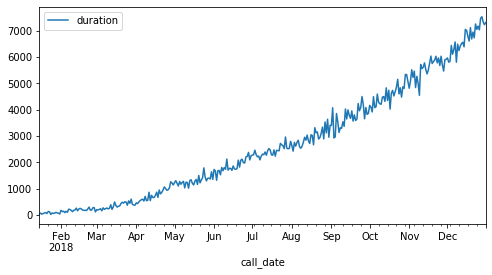

In [16]:
#check if amount of calls is alright by creating a pivot table and 
#have a look at how does amount of calls change throughout the year 
(data_calls
 .pivot_table(index='call_date', values='duration', aggfunc='sum')
 .plot(y='duration', figsize=(8,4), style='-')
)
 

Looks like amount of calls has been incresing throughot the year, but maybe the same thing happened to amount of users. Let's check that by creating a pivot table that will have amount of unique user_ids for each month

In [17]:
#Looks like amount of calls has been incresing throughot the year, but maybe the same thing happened to amount of users
#Let's check that by creating a pivot table that will have amount of unique user_ids for each month
#firstly I need create new column with month, and actually I'm going to need it later
data_calls['month'] = data_calls['call_date'].dt.month
#then create a pivot table with unique values of user_id as values and month as index
data_calls.pivot_table (index='month', values='user_id', aggfunc=lambda x: len(x.dropna().unique()))

,user_id
month,
1,6
2,15
3,35
4,71
5,104
6,141
7,179
8,230
9,277


Looks like there really are less people in our slice from begining of the year.

In [18]:
#looks like there really are less people in our slice from begining of the year
#Now let's calculate amount of calls and calls durations for each user in each month
#I'll do it using pivot_table
dt_calls_grouped = (data_calls
                    .pivot_table(index=['user_id','month'], values=('duration'), aggfunc=('sum','count'))
                    .reset_index()
                   )
dt_calls_grouped.columns = ['user_id', 'month', 'calls_per_month', 'call_time_per_month']
dt_calls_grouped

,user_id,month,calls_per_month,call_time_per_month
0,1000,12,16,116.83
1,1001,8,27,171.14
2,1001,9,49,297.69
3,1001,10,65,374.11
4,1001,11,64,404.59
...,...,...,...,...
2253,1498,12,39,324.77
2254,1499,9,41,330.37
2255,1499,10,53,363.28
2256,1499,11,45,288.56


In [19]:
#Now let's check internet data
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
mb_used         104825 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,user_id
month,
1,6
2,16
3,35
4,70
5,105
6,142
7,179
8,230
9,279


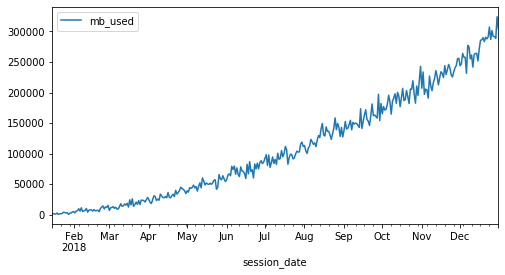

In [20]:
data_internet['month'] = data_internet['session_date'].dt.month
(data_internet
 .pivot_table(index='session_date', values='mb_used', aggfunc='sum')
 .plot(y='mb_used', figsize=(8,4), style='-')
)
data_internet.pivot_table (index='month', values='user_id', aggfunc=lambda x: len(x.unique()))

In [21]:
#looks like everything has the same dynamics as with data for calls 
#now I'll count volume of data per month for each user

dt_internet_grouped = (data_internet
                    .pivot_table(index=['user_id','month'], values=('mb_used'), aggfunc=('sum'))
                    .reset_index()
                   )
dt_internet_grouped.columns = ['user_id', 'month', 'mb_per_month']
dt_internet_grouped

,user_id,month,mb_per_month
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [22]:
#now let's do the same for texts
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,user_id
month,
1,4
2,11
3,23
4,52
5,77
6,111
7,138
8,181
9,222


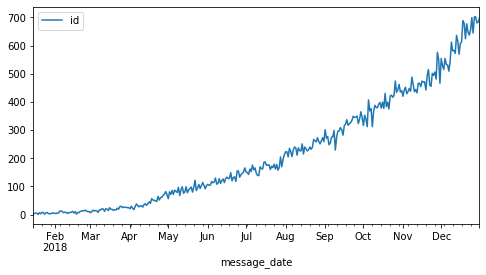

In [23]:
data_messages['month'] = data_messages['message_date'].dt.month
(data_messages
 .pivot_table(index='message_date', values='id', aggfunc='count')
 .plot(y='id', figsize=(8,4), style='-')
)
data_messages.pivot_table (index='month', values='user_id', aggfunc=lambda x: len(x.unique()))

In [24]:
#looks like everything has the same dynamics as with data for calls and internet 
#now I'll count amount of messages per month for each user

dt_messages_grouped = (data_messages
                    .pivot_table(index=['user_id','month'], values=('id'), aggfunc=('count'))
                    .reset_index()
                   )
dt_messages_grouped.columns = ['user_id', 'month', 'sms_per_month']
dt_messages_grouped

,user_id,month,sms_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [25]:
#merge all 3 tables together in united table
data_frames = [dt_calls_grouped, dt_internet_grouped, dt_messages_grouped]
dt_grouped = reduce(lambda left, right :pd.merge(left,right,on=['user_id','month'], how='outer', ),data_frames).fillna(0)
dt_grouped

,user_id,month,calls_per_month,call_time_per_month,mb_per_month,sms_per_month
0,1000,12,16.0,116.83,1901.47,11.0
1,1001,8,27.0,171.14,6919.15,30.0
2,1001,9,49.0,297.69,13314.82,44.0
3,1001,10,65.0,374.11,22330.49,53.0
4,1001,11,64.0,404.59,18504.30,36.0
...,...,...,...,...,...,...
2288,1349,10,0.0,0.00,13093.55,76.0
2289,1349,11,0.0,0.00,17128.26,72.0
2290,1349,12,0.0,0.00,13039.91,61.0
2291,1361,5,0.0,0.00,1519.69,2.0


In [26]:
#Calculate profit for each user for each month. For this I will create a function

def calc_profit(dt, plans, users):
    #function for calculating profit based on a dataframe
    #function accepts 3 arguments: dataframe with spendings, dataframe with plans and info from them
    #and dataframe with information about users and their plans
    #function works only if plans for are set as indexes for plans dataframe
    #This function can work with different amount of plans without need to change anything.
    
    user_id = dt['user_id']
    
    #define extra payment variables
    extra_pay_calls = 0
    extra_pay_gb = 0
    extra_pay_sms = 0
    
    #get user plan from users dataframe
    plan = users.query('user_id == @user_id')['plan'].values[0]
    
    monthly_pay = plans.loc[plan,'usd_monthly_pay'] #calculate basic payment for the plan
    
    if dt['call_time_per_month'] > plans.loc[plan, 'minutes_included']: #calculate extra minutes payment
        extra_pay_calls = np.ceil(((dt['call_time_per_month'] - plans.loc[plan, 'minutes_included']))
        * plans.loc[plan, 'usd_per_minute'])
    
    
    if dt['mb_per_month'] > plans.loc[plan,'mb_per_month_included']: 
    #here get value of used mb
    #then divide it by amount of mb in gb and round it up to nearest whole number. 
    #Then it gets multiplied by price per extra gb
        extra_pay_gb = ((np.ceil((dt['mb_per_month'] - plans.loc[plan,'mb_per_month_included']) / 1024))
        * plans.loc[plan, 'usd_per_gb'])

    ##calculate extra sms payment
    if dt['sms_per_month'] > plans.loc[plan, 'messages_included']: 
        extra_pay_sms = ((dt['sms_per_month'] - plans.loc[plan, 'messages_included']) * plans.loc[plan, 'usd_per_message'])
    
    return monthly_pay + extra_pay_calls + extra_pay_gb + extra_pay_sms

dt_grouped['profit'] = dt_grouped.apply(calc_profit, axis=1, args=(data_plans, data_users))
dt_grouped
        

,user_id,month,calls_per_month,call_time_per_month,mb_per_month,sms_per_month,profit
0,1000,12,16.0,116.83,1901.47,11.0,70.00
1,1001,8,27.0,171.14,6919.15,30.0,20.00
2,1001,9,49.0,297.69,13314.82,44.0,20.00
3,1001,10,65.0,374.11,22330.49,53.0,90.09
4,1001,11,64.0,404.59,18504.30,36.0,60.00
...,...,...,...,...,...,...,...
2288,1349,10,0.0,0.00,13093.55,76.0,20.78
2289,1349,11,0.0,0.00,17128.26,72.0,40.66
2290,1349,12,0.0,0.00,13039.91,61.0,20.33
2291,1361,5,0.0,0.00,1519.69,2.0,20.00


Fixed the code, made it more readable, got rid of column alias that were not needed and passed extra dataframes as arguments.

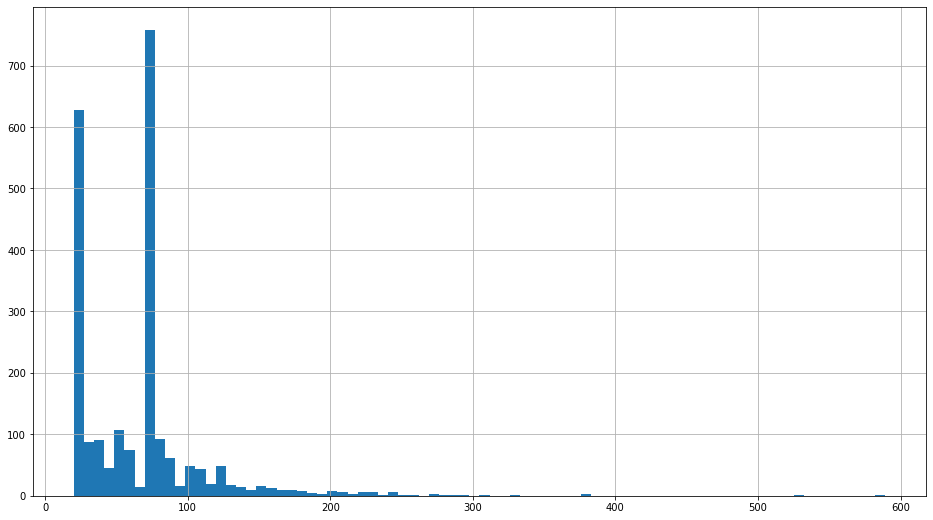

In [27]:
#Great! Now let's check how it generally looks
dt_grouped.profit.hist(bins='auto', figsize=(16,9))

In [28]:
#finally let's append plan for each user
dt_grouped = pd.merge(dt_grouped, data_users[['user_id','plan']], on='user_id')
dt_grouped

,user_id,month,calls_per_month,call_time_per_month,mb_per_month,sms_per_month,profit,plan
0,1000,12,16.0,116.83,1901.47,11.0,70.00,ultimate
1,1001,8,27.0,171.14,6919.15,30.0,20.00,surf
2,1001,9,49.0,297.69,13314.82,44.0,20.00,surf
3,1001,10,65.0,374.11,22330.49,53.0,90.09,surf
4,1001,11,64.0,404.59,18504.30,36.0,60.00,surf
...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,0.00,21346.95,42.0,70.00,ultimate
2289,1204,12,0.0,0.00,36730.05,78.0,112.00,ultimate
2290,1349,10,0.0,0.00,13093.55,76.0,20.78,surf
2291,1349,11,0.0,0.00,17128.26,72.0,40.66,surf


Replaced with merge:)

That's good that there most of the users spent 20 or 70 dollars. Let's check the big values for mistakes.

In [29]:
dt_grouped.query('profit > 300')

,user_id,month,calls_per_month,call_time_per_month,mb_per_month,sms_per_month,profit,plan
1101,1240,8,161.0,1038.88,49950.58,15.0,377.00,surf
1103,1240,10,162.0,1129.04,42128.84,9.0,309.00,surf
1330,1292,8,42.0,304.67,51809.35,0.0,380.00,surf
1332,1292,10,42.0,290.79,46868.75,0.0,330.00,surf
1334,1292,12,28.0,132.65,52034.66,0.0,380.00,surf
1726,1379,12,144.0,1045.24,70931.59,126.0,589.28,surf
2271,1121,12,0.0,0.00,66863.89,97.0,531.41,surf


In [30]:
#Here I'll do manual calculations for user_id - 1121, his plan is surf:
selected_profit = 20 + np.ceil(((66863.89 - 15360)/1024))*10 + (97-50)*0.03
print (selected_profit)
if selected_profit == dt_grouped.query('user_id == 1121').profit.max():
    print ('Calculations are right!')

531.41
Calculations are right!


Now I'll make a histogram for profit for surf plan and for ultimate plan to see how they differ.

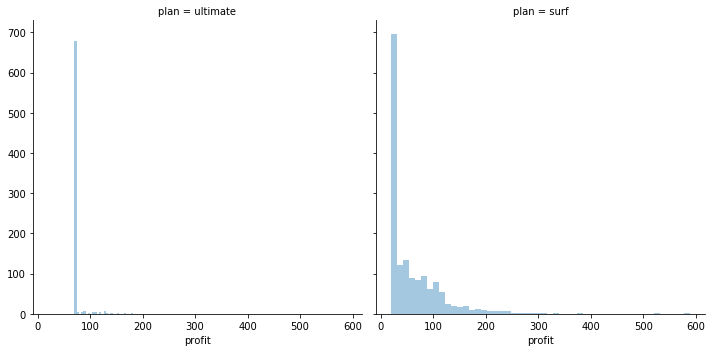

In [31]:

g = sns.FacetGrid(dt_grouped, col="plan", height=5, aspect=1)
g.map(sns.distplot, 'profit', kde=False)

From here I can see that most of users stay within their plans, but for surf plan we see more people needing more stuff that the plan provides and therefore more people are paying extra. While in ultimate plan it happends more rarely, and most people really stick to their plan.

### Conclusion

In this part of the project I have converted data to more usable format: I have grouped all the user data by user id and by month and have calculated overall spending for each user for each month. Having data aligned like this will make all further analysis much easier.

## Step 3. Analyze the data

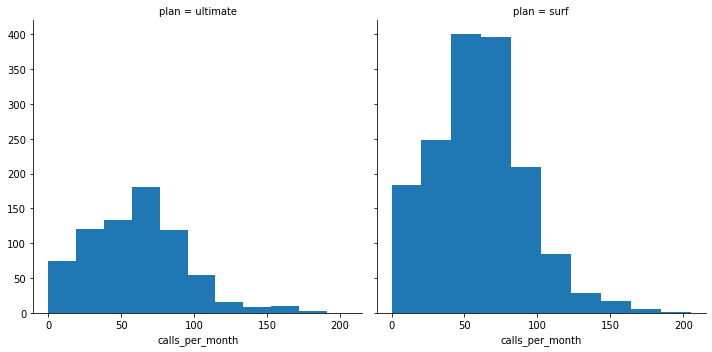

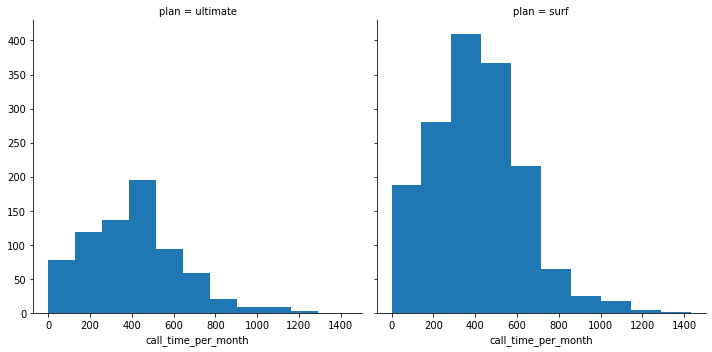

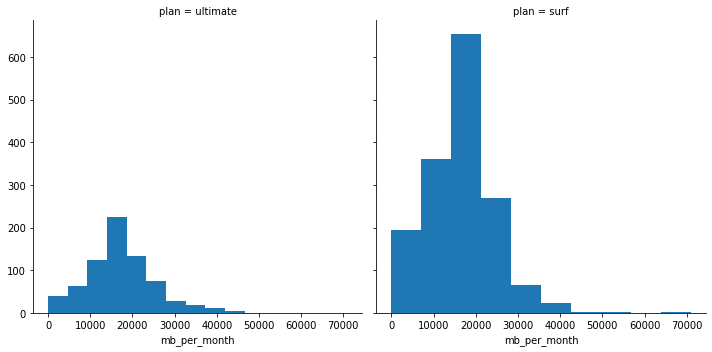

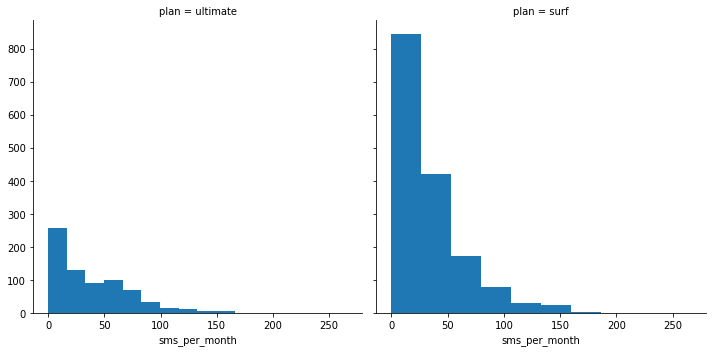

In [32]:
#Firstly I'm going to analize this plans in parallel by making histograms for them next to each other 
#list of columns for analizing
analized_col = ['calls_per_month', 'call_time_per_month', 'mb_per_month', 'sms_per_month']


for col in analized_col:
    g = sns.FacetGrid(dt_grouped, col="plan", height=5, aspect=1) #create grid
    g.map(plt.hist, col); #print histogramm

I see here that data differs in volume, but the shape is pretty alike. Now I'll print the same histograms, but showing densities.

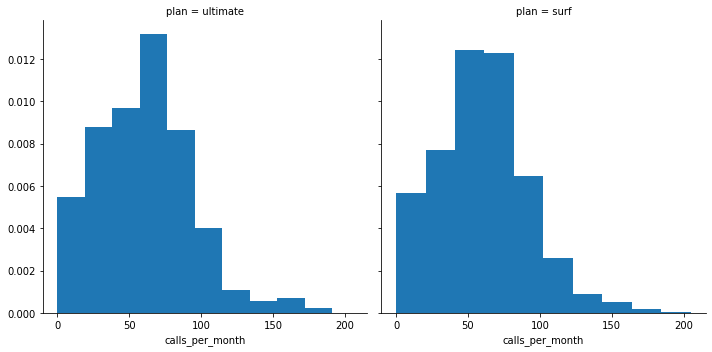

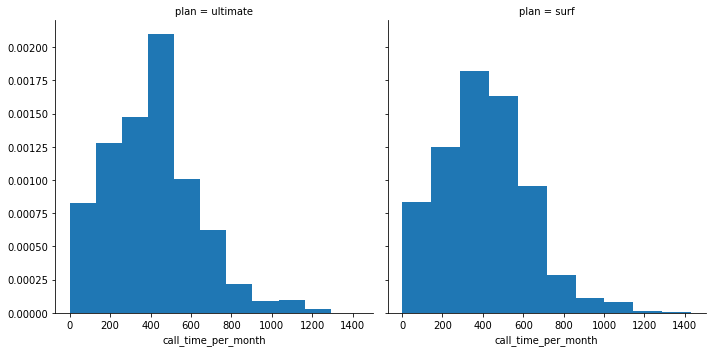

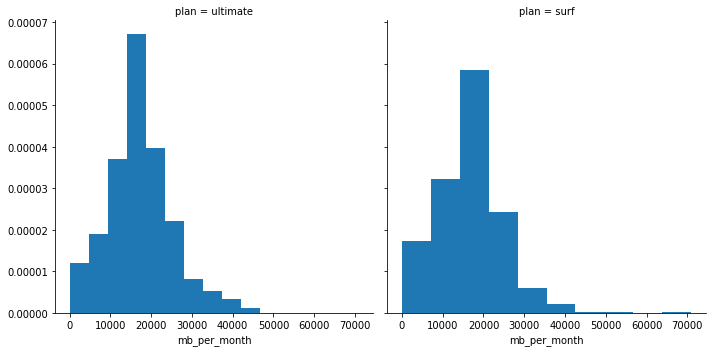

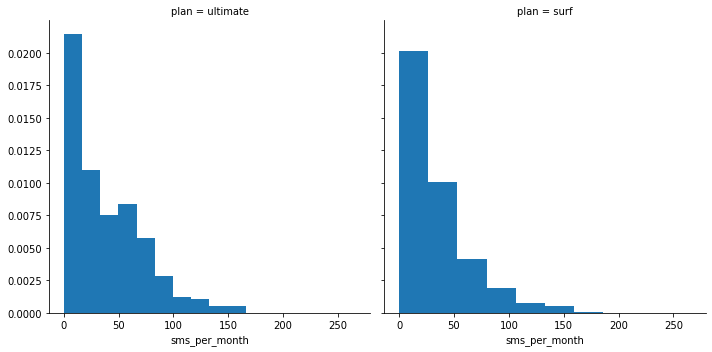

In [33]:
for col in analized_col:
    g = sns.FacetGrid(dt_grouped, col="plan", height=5, aspect=1) #create grid
    g.map(plt.hist, col, density=True); #print histogramm

Yes here I see that the behavior of clients using different plan is very much alike, they spend pretty much the same amount of internet, send similar amount of sms and make similar amount of calls.
Now let's check boxplots for each plan to see if we will be able to see differences there.

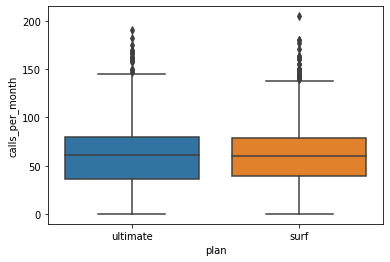

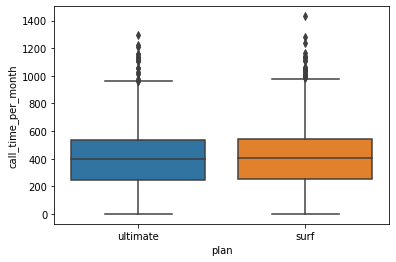

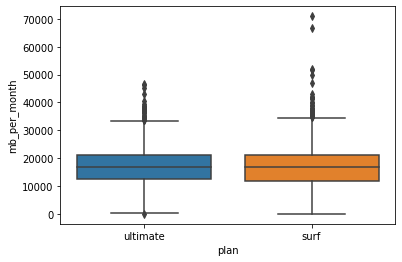

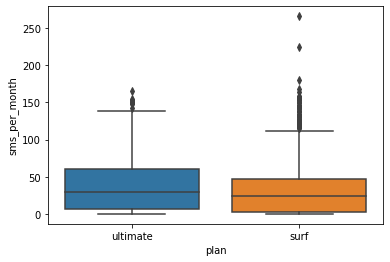

In [34]:
for col in analized_col:
    plt.figure(col)
    ax=sns.boxplot(x="plan", y=col, order=["ultimate", 'surf'], data=dt_grouped);

From here I see that even all the quantiles are very similar, only for internet I see that users of surf plan spend a bit less on average that users of ultimate plan. Also from these boxplots I see that there are more outliers for surf plan that in ultimate.

Now let's build some scatter plots with profit as x axis and internet/mb/sms as y axis to see which one is affecting the profit more often.

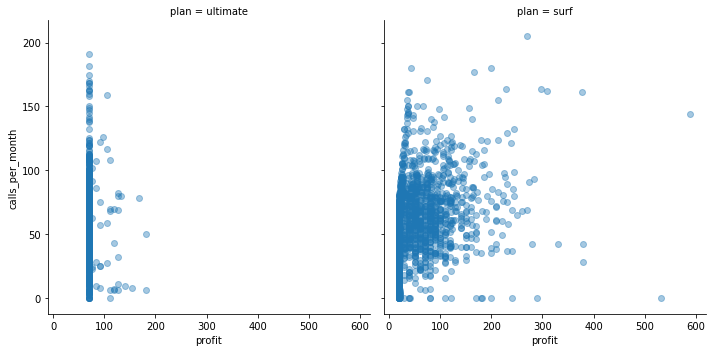

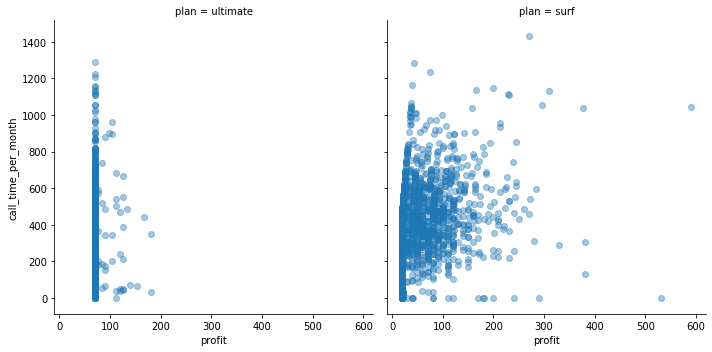

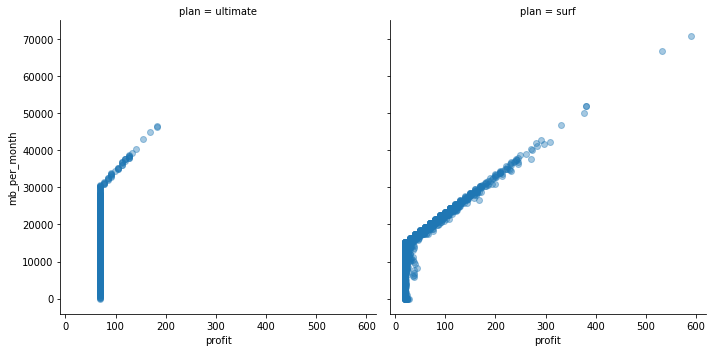

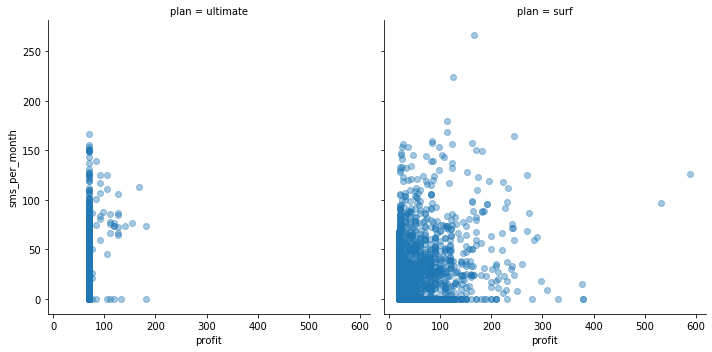

In [35]:
for col in analized_col:
    g = sns.FacetGrid(dt_grouped, col="plan", height=5, aspect=1) #create grid
    g.map(plt.scatter, "profit", col, alpha=.4); #print histogram

From this plot I see that most of the uusers who are spending more money are purchasing extra mb. It's visual that there is no definite correlation between profit and sms, very little between profit and amount/length of calls and a definite correlation between profit mb used.

In [37]:
#describe for each plan
dt_grouped.query('plan =="ultimate"').describe()

,user_id,month,calls_per_month,call_time_per_month,mb_per_month,sms_per_month,profit
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,9.151389,60.626389,406.193083,17214.699694,37.551389,72.313889
std,150.915644,2.558495,33.242994,227.246499,7851.897435,34.767179,11.395108
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,8.000000,36.000000,246.290000,12666.955000,7.000000,70.000000
50%,1241.500000,10.000000,61.000000,398.585000,16858.340000,30.000000,70.000000
75%,1401.000000,11.000000,80.000000,532.227500,21014.527500,61.000000,70.000000
max,1497.000000,12.000000,191.000000,1292.090000,46595.330000,166.000000,182.000000


In [38]:
#Find the minutes, texts, and volume of data the users of each plan require per month. 
#Calculate the mean, dispersion, and standard deviation.
dt_optimal = (dt_grouped[['calls_per_month','call_time_per_month','mb_per_month','sms_per_month','plan']]
              .groupby('plan')
              .agg((('standart',np.std), ('mean',np.mean), ('var', np.var), ('required minimum',lambda x: (np.mean(x) - 3*np.std(x))), 
                    ('required maximum',lambda x: (np.mean(x) + 3*np.std(x)))
                   )) 
             .round(2)
             .transpose()
             )
dt_optimal

plan                                         surf     ultimate
calls_per_month     standart                32.02        33.24
                    mean                    59.81        60.63
                    var                   1025.15      1105.10
                    required minimum       -36.21       -39.03
                    required maximum       155.84       160.29
call_time_per_month standart               221.66       227.25
                    mean                   404.76       406.19
                    var                  49135.10     51640.97
                    required minimum      -260.02      -275.07
                    required maximum      1069.54      1087.46
mb_per_month        standart              8013.51      7851.90
                    mean                 16558.28     17214.70
                    var               64216395.84  61652293.32
                    required minimum     -7474.61     -6324.63
                    required maximum     40591.18     40754.03
sms_per_month       standart                33.57        34.77
                    mean                    31.16        37.55
                    var                   1126.72      1208.76
                    required minimum       -69.51       -66.68
                    required maximum       131.83       141.78

If you only knew how hard it was to make it like that:)

In [39]:
data_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
plan_name,,,,,,,
surf,50,15360,500,20,10,0.03,0.03
ultimate,1000,30720,3000,70,7,0.01,0.01


### Conclusion

Based on this data I'm able to make several conclusions:
* User behavior for ultimate plan and for surf plan is pretty alike, aside from amount of users signed to each one, average user of ultimate plan doesn't waste more of internet or calls or sms than user of surf plan.
* most of users of Surf plan go over the limit with amount of mb spent
* 99.7 of users of Ultimate plan don't spend that amount of everything that they have included.
* Most profit is recieved from extra mb that users are buying.
* Users of Ultimate plan are more likely to stany within their plan limits, there are much more outliers within users of Surf plan.


## Step 4. Test the hypotheses



Here I'm going to test two hypotheeses:
1. The average profit from users of Ultimate and Surf calling plans differs.
2. The average profit from users in NY-NJ area is different from that of the users from other regions.

Let's start with the 1st one.

First thing I have to do is to make a null hypothesis. It will be:

<b>The average profit from users of Ultimate plan equals the average profit from Surf calling plan.</b>


Forgot to delete them, now fixed it.

In [40]:
ultimate = list(dt_grouped.query('plan == "ultimate"').profit)
surf = list(dt_grouped.query('plan == "surf"').profit)


alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

print ('Average profit from users of Ultimate plan: {:.2f}'.format(mean(ultimate)))
print ('Average profit from users of Surf plan: {:.2f}'.format(mean(surf)))

print ('Variance of profit for users of ultimate plan {:.2f}'.format(np.var(ultimate)))
print ('Variance of profit for users of surf plan {:.2f}'.format(np.var(surf)))
    
results = st.ttest_ind(
    ultimate,
    surf)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

Average profit from users of Ultimate plan: 72.31
Average profit from users of Surf plan: 60.49
Variance of profit for users of ultimate plan 129.67
Variance of profit for users of surf plan 3056.57
p-value:  1.5047254582344138e-08
We reject the null hypothesis


#### Conclusion
Therefore we chave a reason to reject this hypothesis and assume that average profit from users of Ultimate plan differs from average profit from users of Surf plan.

Now let's check the second hypothesis. Null hyposthesis will be:

<b>The average profit from users in NY-NJ area isn't different from that of the users from other regions.</b>

In [41]:
data_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [42]:
data_users.city.value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Greensboro-High Point, NC MSA                       1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Jacksonville, FL MSA                                1
Stockton, CA MSA                                    1
Raleigh-Cary, NC MSA                                1
Name: city, Length: 73, dtype: int64

In [43]:
def ny_nj (row):
#     function for finding out citizens of NY or NJ state
    if 'NY' in row.split(',')[1].split('-'): return True #if after "," there is NY return true
    elif 'NJ' in row.split(',')[1].split('-'): return True #if after "," there is NJ return true
    else: return False

data_users['new_yorker'] = data_users.city.apply(ny_nj)

In [44]:
#Let's check how many we have in our data
data_users.new_yorker.value_counts()

False    403
True      97
Name: new_yorker, dtype: int64

In [45]:
#create lists with revenues for NYers and others
dt_grouped_new_york_check = pd.merge(dt_grouped, data_users[['user_id','new_yorker']], on='user_id')
dt_grouped_new_york_check

,user_id,month,calls_per_month,call_time_per_month,mb_per_month,sms_per_month,profit,plan,new_yorker
0,1000,12,16.0,116.83,1901.47,11.0,70.00,ultimate,False
1,1001,8,27.0,171.14,6919.15,30.0,20.00,surf,False
2,1001,9,49.0,297.69,13314.82,44.0,20.00,surf,False
3,1001,10,65.0,374.11,22330.49,53.0,90.09,surf,False
4,1001,11,64.0,404.59,18504.30,36.0,60.00,surf,False
...,...,...,...,...,...,...,...,...,...
2288,1204,11,0.0,0.00,21346.95,42.0,70.00,ultimate,False
2289,1204,12,0.0,0.00,36730.05,78.0,112.00,ultimate,False
2290,1349,10,0.0,0.00,13093.55,76.0,20.78,surf,False
2291,1349,11,0.0,0.00,17128.26,72.0,40.66,surf,False


In [46]:
new_yorker = list(dt_grouped_new_york_check.query('new_yorker == True').profit) #profits only for new_yorkers
not_new_yorker = list(dt_grouped_new_york_check.query('new_yorker == False').profit) #the rest


#now let's check our hypothesis

print ('Average profit from residents of NY-NJ: {:.2f}'.format(mean(new_yorker)))
print ('Average profit from residents of other states: {:.2f}'.format(mean(not_new_yorker)))
print ('Variance of profit for users from NY-NJ {:.2f}'.format(np.var(new_yorker)))
print ('Variance of profit for users from other states {:.2f}'.format(np.var(not_new_yorker)))

alpha = .05 # critical statistical significance level

results = st.ttest_ind(
        new_yorker, 
        not_new_yorker)

print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")


Average profit from residents of NY-NJ: 60.42
Average profit from residents of other states: 65.15
Variance of profit for users from NY-NJ 2026.72
Variance of profit for users from other states 2198.44
p-value:  0.05174064802570269
We can't reject the null hypothesis


Based on this conclusion we can't say that average profit from New Yorkers is different as from residents of other states (but we also can't say that it is definetly the same).

## General conclusion

While analysing this slice of data I have made several interesting conclusions:
1. Behavior of people that use Ultimate and Surf plans are very alike. So we can suppose that users of Ultimate plan use it just for comfort and maybe because of status. It's possible to change the amount of services that they are getting without affecting the amount that they will use. So we can give it to marketing team, maybe they will find something to do with that.
2. First null theorie got rejected, so we know now that profit from Ultimate plan differs from profit from Surf plan (we can't definetly say which way, but it does for sure). 
3. Second theory didn't get rejected, therefore we are not able to say if profit from residents of NY-NJ is definetly different from profit from other states.
